### Random Search Cross Validation in Scikit-Learn

In [1]:
import pandas as pd
import numpy as np

import copy


data = pd.read_csv('Dataset/itu_Estimted_QoE.csv')
display(data.shape)

display(data.head(5))

(2090, 4)

,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu
0,0,1,5,3.119406
1,1,3,5,4.282069
2,2,2,5,4.278156
3,3,3,5,4.278085
4,4,2,5,4.275066


In [2]:
itu_pred_summary = []

for i in np.arange(1, 5, 1):
    
    if i == 4:
        df_user_fb = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == i) | (data['FEEDBACK_VALUE'] == i+1)])
    else:
        df_user_fb = copy.deepcopy(data[data['FEEDBACK_VALUE'] == i])

    col_qoe_itu = df_user_fb['QoE_itu']
    median = np.median(col_qoe_itu)
    mean = np.mean(col_qoe_itu)
    maximum = np.max(col_qoe_itu)
    minimum = np.min(col_qoe_itu)
    Q1 = col_qoe_itu.quantile(.25)
    Q3 = col_qoe_itu.quantile(.75)
    print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f Q1: %.5f Q3: %.5f' %(maximum, minimum, median, mean, Q1, Q3))
    _temp = [maximum, minimum, median, mean, Q1, Q3]
    itu_pred_summary.append(_temp)

df_summary = pd.DataFrame(itu_pred_summary, columns=['Maximum', 'Minimum', 'Median', 'Mean', 'Q1', 'Q3'], \
                          index=np.arange(1,5, 1))
display(df_summary.head(5))
df_summary.to_csv('Dataset/itu_prediction_summary_group4-5.csv')

Max: 4.27854 Min: 1.54095 Median: 1.94378 Mean: 2.07410 Q1: 1.65706 Q3: 2.20538
Max: 4.27816 Min: 1.61110 Median: 2.17848 Mean: 2.26228 Q1: 1.98636 Q3: 2.30213
Max: 4.28207 Min: 1.58940 Median: 2.22574 Mean: 2.36141 Q1: 1.95611 Q3: 2.54564
Max: 4.28027 Min: 1.58261 Median: 2.48466 Mean: 2.67585 Q1: 2.05442 Q3: 3.42468


,Maximum,Minimum,Median,Mean,Q1,Q3
1,4.278536,1.540953,1.943783,2.074096,1.657063,2.205383
2,4.278156,1.611095,2.178477,2.262277,1.986364,2.302132
3,4.282069,1.589398,2.225738,2.361405,1.956110,2.545636
4,4.280274,1.582614,2.484660,2.675851,2.054423,3.424679


In [13]:
# FB 1
mos_feedback = 1
df_user_fb_1 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])
col_qoe_itu = df_user_fb_1['QoE_itu']
median_1 = np.median(col_qoe_itu)
mean = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f' %(maximum, minimum, median_1, mean))

# FB 2
mos_feedback = 2
df_user_fb_2 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])

col_qoe_itu = df_user_fb_2['QoE_itu']
median = np.median(col_qoe_itu)
mean = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

Q1 = col_qoe_itu.quantile(.25)
Q3_2 = col_qoe_itu.quantile(.75)
print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f Q1: %.5f Q3_2: %.5f' %(maximum, minimum, median, mean, Q1, Q3_2))

# FB 3
mos_feedback = 3
df_user_fb_3 = copy.deepcopy(data[data['FEEDBACK_VALUE'] == mos_feedback])

col_qoe_itu = df_user_fb_3['QoE_itu']
median = np.median(col_qoe_itu)
mean = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

Q1 = col_qoe_itu.quantile(.25)
Q3_3 = col_qoe_itu.quantile(.75)
print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f Q1: %.5f Q3_3: %.5f' %(maximum, minimum, median, mean, Q1, Q3_3))

# FB 4
mos_feedback = 4
df_user_fb_4 = copy.deepcopy(data[(data['FEEDBACK_VALUE'] == mos_feedback) | (data['FEEDBACK_VALUE'] == mos_feedback + 1)])

#display(df_user_fb_4.shape)

col_qoe_itu = df_user_fb_4['QoE_itu']
median = np.median(col_qoe_itu)
mean = np.mean(col_qoe_itu)
maximum = np.max(col_qoe_itu)
minimum = np.min(col_qoe_itu)

Q1 = col_qoe_itu.quantile(.25)
Q3_4 = col_qoe_itu.quantile(.75)

print('Max: %.5f Min: %.5f Median: %.5f Mean: %.5f Q1: %.5f Q3: %.5f' %(maximum, minimum, median, mean, Q1, Q3_4))

Max: 4.27854 Min: 1.54095 Median: 1.94378 Mean: 2.07410
Max: 4.27816 Min: 1.61110 Median: 2.17848 Mean: 2.26228 Q1: 1.98636 Q3_2: 2.30213
Max: 4.28207 Min: 1.58940 Median: 2.22574 Mean: 2.36141 Q1: 1.95611 Q3_3: 2.54564
Max: 4.28027 Min: 1.58261 Median: 2.48466 Mean: 2.67585 Q1: 2.05442 Q3: 3.42468


In [4]:
def _map_class_1(X_target):
    """ Convert string to float
    """
    
    if X_target < median_1:
        return 1
    elif X_target >= median_1 and X_target <= Q3_2:
        return 2
    elif X_target > Q3_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5

df_user_fb_1['itu_QoE_Class'] = df_user_fb_1['QoE_itu'].apply(lambda x: str(_map_class_1(x)))
groupby_itu_cl_1 = df_user_fb_1.groupby(['itu_QoE_Class']).count().reset_index()

#display(df_user_fb_1.head(5))

groupby_itu_cl_1['Frequency %'] = groupby_itu_cl_1['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_1['FEEDBACK_VALUE'])
groupby_itu_cl_1['MoS_Feedback'] = str(1)

display(groupby_itu_cl_1.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,137,137,137,137,0.500000,1
1,2,89,89,89,89,0.324818,1
2,3,12,12,12,12,0.043796,1
3,4,36,36,36,36,0.131387,1


### User Feedback 2

In [5]:
def _map_class_2(X_target):
    """ Convert string to float
    """
    
    if X_target < median_1:
        return 1
    elif X_target >= median_1 and X_target <= Q3_2:
        return 2
    elif X_target > Q3_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5

df_user_fb_2['itu_QoE_Class'] = df_user_fb_2['QoE_itu'].apply(lambda x: str(_map_class_2(x)))
groupby_itu_cl_2 = df_user_fb_2.groupby(['itu_QoE_Class']).count().reset_index()

#display(df_user_fb_2.head(5))

groupby_itu_cl_2['Frequency %'] = groupby_itu_cl_2['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_2['FEEDBACK_VALUE']) 
groupby_itu_cl_2['MoS_Feedback'] = str(2)

display(groupby_itu_cl_2.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,32,32,32,32,0.198758,2
1,2,90,90,90,90,0.559006,2
2,3,13,13,13,13,0.080745,2
3,4,26,26,26,26,0.161491,2


### User Feedback 3

In [6]:
def _map_class_3(X_target):
    """ Convert string to float
    """
    
    if X_target < median_1:
        return 1
    elif X_target >= median_1 and X_target <= Q3_2:
        return 2
    elif X_target > Q3_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5


df_user_fb_3['itu_QoE_Class'] = df_user_fb_3['QoE_itu'].apply(lambda x: str(_map_class_3(x)))
groupby_itu_cl_3 = df_user_fb_3.groupby(['itu_QoE_Class']).count().reset_index()

#display(df_user_fb_2.head(5))

groupby_itu_cl_3['Frequency %'] = groupby_itu_cl_3['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_3['FEEDBACK_VALUE']) 
groupby_itu_cl_3['MoS_Feedback'] = str(3)

display(groupby_itu_cl_3.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,51,51,51,51,0.223684,3
1,2,93,93,93,93,0.407895,3
2,3,30,30,30,30,0.131579,3
3,4,54,54,54,54,0.236842,3


### User Feedback 4 and 5

In [7]:
def _map_class_4(X_target):
    """ Convert string to float
    """
    
    if X_target < median_1:
        return 1
    elif X_target >= median_1 and X_target <= Q3_2:
        return 2
    elif X_target > Q3_2 and X_target <= Q3_3:
        return 3
    elif X_target > Q3_3 and X_target <= 4.5:
        return 4
    elif X_target > 4.5:
        return 5

df_user_fb_4['itu_QoE_Class'] = df_user_fb_4['QoE_itu'].apply(lambda x: str(_map_class_4(x)))

groupby_itu_cl_4 = df_user_fb_4.groupby(['itu_QoE_Class']).count().reset_index()

groupby_itu_cl_4['Frequency %'] = groupby_itu_cl_4['FEEDBACK_VALUE'] / np.sum(groupby_itu_cl_4['FEEDBACK_VALUE'])
groupby_itu_cl_4['MoS_Feedback'] = str(4) + '_' + str(4+1)

display(groupby_itu_cl_4.head(5))

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback
0,1,246,246,246,246,0.172390,4_5
1,2,360,360,360,360,0.252278,4_5
2,3,166,166,166,166,0.116328,4_5
3,4,655,655,655,655,0.459005,4_5


In [8]:
def _convert_class_str(X_target):
    """ Convert string to float
    """
    return 'MoS_' + str(X_target)

display(_convert_class_str(1))

'MoS_1'

In [9]:
# df_itus = []
# for i in np.arange(1, 6, 1):
#     df_itus.append(pd.DataFrame('groupby_itu_cl_' + str(i)))
    
# print(df_itus)

df_itus = [groupby_itu_cl_1, groupby_itu_cl_2, groupby_itu_cl_3, groupby_itu_cl_4]
df_itu_qoe_class = pd.concat(df_itus)

# Convert MoS to string
df_itu_qoe_class['MoS_Feedback_Class'] = df_itu_qoe_class['MoS_Feedback'].apply(lambda x: _convert_class_str(x))

# Round Freq to 2 decimals
df_itu_qoe_class['Frequency_Round %'] = np.round(df_itu_qoe_class['Frequency %'], 2)


display(df_itu_qoe_class)

# Pivot DF
df_MoS_Feedback_IUT_QoE_Class = pd.pivot_table(df_itu_qoe_class, values='Frequency_Round %', columns=['itu_QoE_Class'], index=['MoS_Feedback_Class'])


#df_MoS_Feedback_IUT_QoE_Class['5'] = float("{0:.6f}".format(0.0))

display(df_MoS_Feedback_IUT_QoE_Class)

,itu_QoE_Class,Unnamed: 0,FEEDBACK_VALUE,YOUTUBE_AUTO_MOS,QoE_itu,Frequency %,MoS_Feedback,MoS_Feedback_Class,Frequency_Round %
0,1,137,137,137,137,0.500000,1,MoS_1,0.50
1,2,89,89,89,89,0.324818,1,MoS_1,0.32
2,3,12,12,12,12,0.043796,1,MoS_1,0.04
3,4,36,36,36,36,0.131387,1,MoS_1,0.13
0,1,32,32,32,32,0.198758,2,MoS_2,0.20
1,2,90,90,90,90,0.559006,2,MoS_2,0.56
2,3,13,13,13,13,0.080745,2,MoS_2,0.08
3,4,26,26,26,26,0.161491,2,MoS_2,0.16
0,1,51,51,51,51,0.223684,3,MoS_3,0.22
1,2,93,93,93,93,0.407895,3,MoS_3,0.41


itu_QoE_Class,1,2,3,4
MoS_Feedback_Class,,,,
MoS_1,0.50,0.32,0.04,0.13
MoS_2,0.20,0.56,0.08,0.16
MoS_3,0.22,0.41,0.13,0.24
MoS_4_5,0.17,0.25,0.12,0.46


In [10]:
df_MoS_Feedback_IUT_QoE_Class.to_csv('Dataset/MoS_Feedback_IUT_QoE_Class_Group4-5.csv')

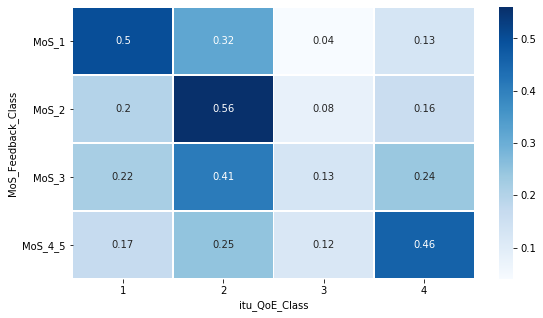

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# plot heatmap
plt.figure(figsize=(9,5))
ax = sns.heatmap(df_MoS_Feedback_IUT_QoE_Class, annot=True, linewidths=.5, cmap='Blues')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(0)

plt.show()